# Módulo 5 - Técnicas de Programação II
# Aula 3 - Matplotlib

*Observação:* Aula criada utilizando a versão 3.5.1 da biblioteca

## Introdução

Matplotlib cria seus gráficos em figuras, contendo um ou mais quadrantes (áreas em que pontos podem ser determinados por coordenadas (x,y)). A forma mais simples de criá-los é utilizando a função pyplot.subplots(), conforme exemplo abaixo.

In [1]:
## Carregando as bibliotecas padrão (pandas e numpy)
import pandas as pd
import numpy as np

## carregando o matplotlib
import matplotlib as mpl ##utilizado para outras funcionalidades, como paleta de cores
import matplotlib.pyplot as plt ##utilizado para criar as figuras e gráficos em si

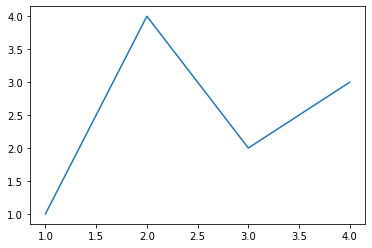

In [2]:
fig, ax = plt.subplots()  # Cria uma figura contendo um único "quadrante"
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Colocando alguns dados no gráfico deste quadrante

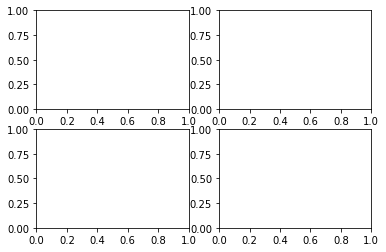

In [3]:
fig, axs = plt.subplots(2,2)  # Cria uma figura contendo uma grade 2x2 (4 quadrantes)

In [4]:
axs[0,0].plot([1,2,3,4],[1,2,3,4]) ## colocando dados no gráfico do primeiro quadrante

axs[1][1].plot([4,3,2,1],[1,2,3,4]) ## colocando dados no gráfico do quarto quadrante

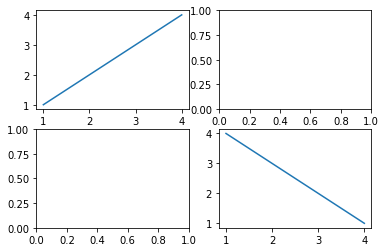

In [5]:
fig

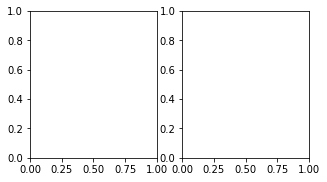

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))

Partes de uma figura do tipo matplotlib:

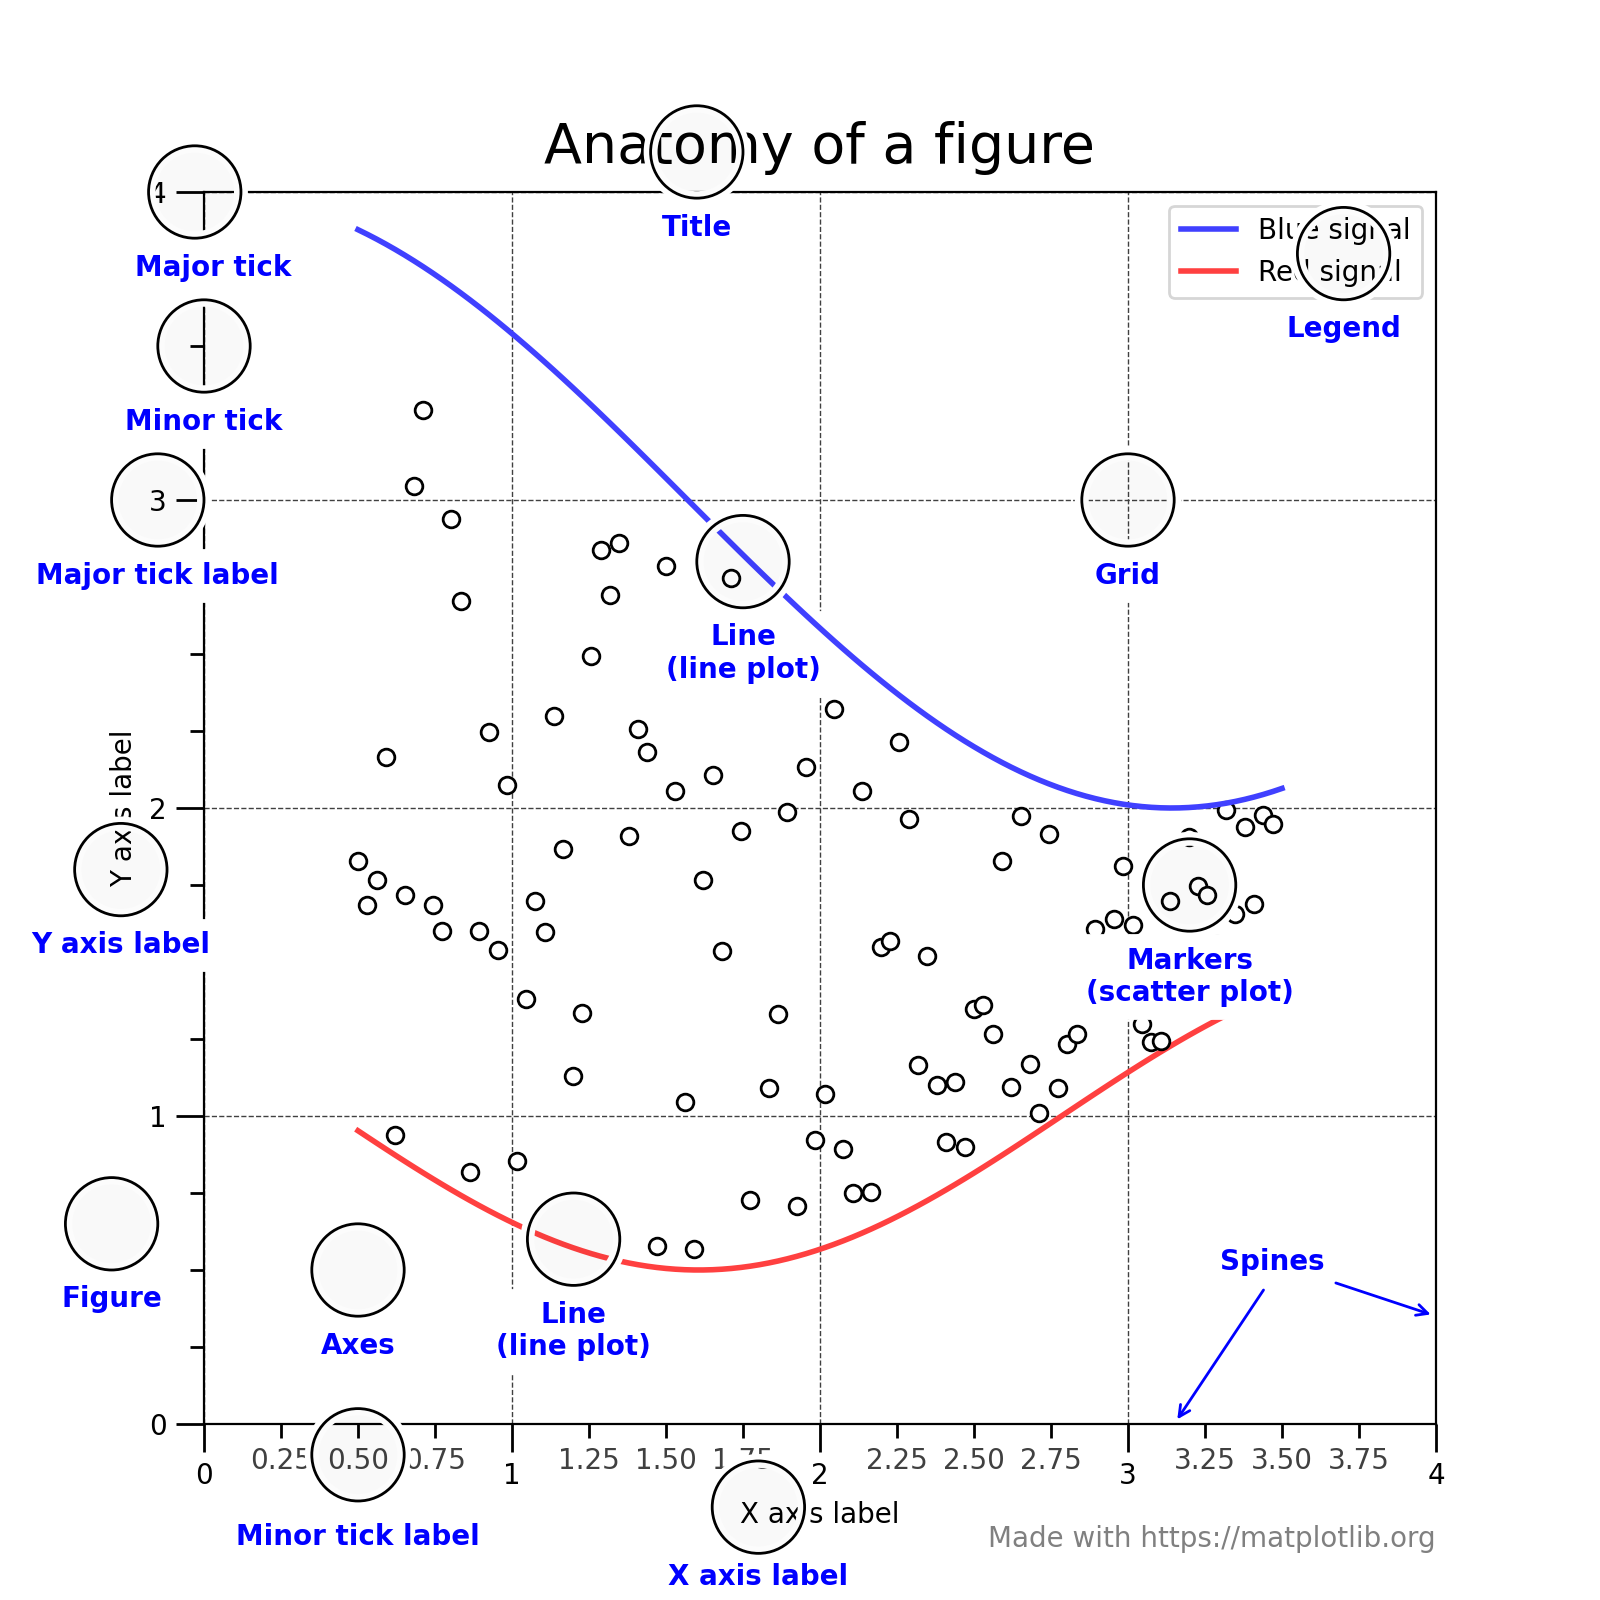


- **Figura (Figure):** A figura como um todo (todo o "desenho" gerado).
- **Eixos (Axes):** Partes de uma figura (quadrantes).
- **Eixo (Axis):** Eixos de um gráfico (exemplo: x e y).

As funções para desenhar ("plotar") os gráficos esperam receber objetos do tipo numpy.array, ou objetos que possam ser passados para np.asarray. Por isso, objetos como matrizes (numpy.matrix), por exemplo, podem não funcionar como esperado, sugerindo-se que se transforme esses objetos em numpy.array.

In [7]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

In [8]:
b

matrix([[1, 2],
        [3, 4]])

In [9]:
b_asarray

array([[1, 2],
       [3, 4]])

Já dicionários e pandas.DataFrame costumam funcionar para a maioria dos métodos. Com eles, o matplotlib permite identificar seus elementos apenas pela 'string' que a identifique (chave do dicionário ou coluna de um dataframe, por exemplo).

Text(0, 0.5, 'Variável b')

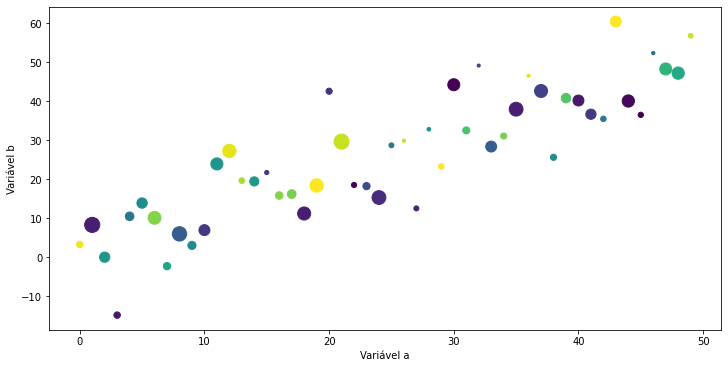

In [10]:
np.random.seed(7)  # seed para gerar número aleatório (de forma a permitir réplicas)
data = {'a': np.arange(50), #Lista de 0 a 49
        'c': np.random.randint(0, 50, 50), # 50 valores inteiros aleatórios
        'd': np.random.randn(50)} # 50 valores aleatórios seguindo a distribuição normal
data['b'] = data['a'] + 10 * np.random.randn(50) # valores de a + 10*valor aleatório, seguindo dist. normal
data['d'] = np.abs(data['d']) * 100 #valores absolutos de d multiplicados por 100

# criando um único quadrante, de tamanho 5x2.7
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained') 
ax.scatter('a', 'b', c='c', s='d', data=data) ## scatter plot de a por b, com cores 'c' e tamanhos 'd'
ax.set_xlabel('Variável a') # colocando o título do eixo x
ax.set_ylabel('Variável b') # colocando o título do eixo y

Existem duas formas de utilizar o matplotlib: 
- Utilizando orientação a objetos (atribui-se a figura e os quadrantes a objetos, e depois trabalha-se com eles);
- Utilizando o pyplot (não se atribui a figura e quadrantes a nenhum objeto, e todas as alterações podem ser feitas diretamente no pyplot).

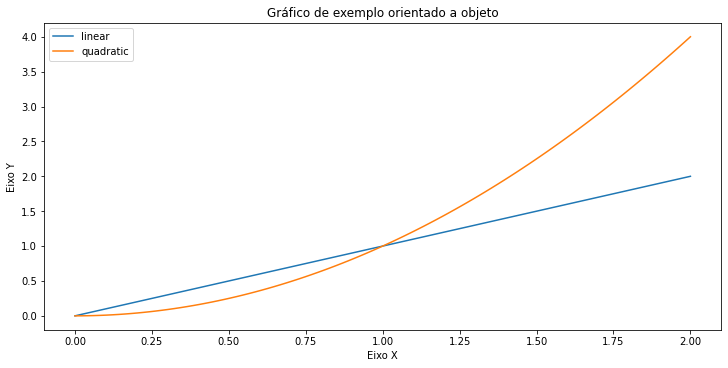

In [11]:
## exemplo de uso orientado a objeto (mais recomendado)
x =  np.linspace(0, 2, 100)  #amostra de dados sequenciais, de 0 a 2.

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained') ## Atribuindo a figura a objetos
ax.plot(x, x, label='linear')  # Desenhando alguns dados
ax.plot(x, x**2, label='quadratic')  # Desenhando outra função no mesmo gráfico

ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_title("Gráfico de exemplo orientado a objeto")
ax.legend()  # adiciona legenda

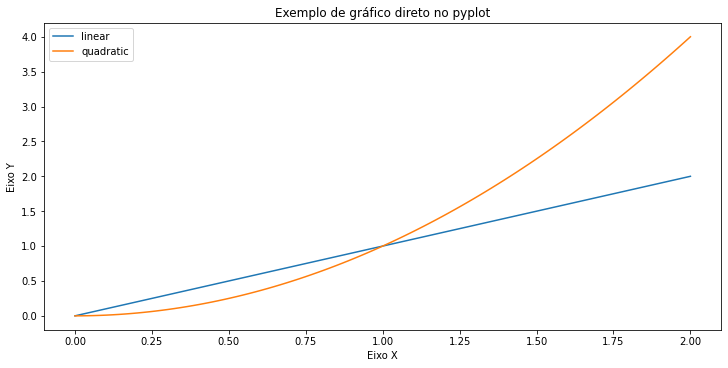

In [12]:
## Exemplo de uso direto no pyplot (utilizado mais para visualizações rápidas)
x = np.linspace(0, 2, 100)  #Mesmo conjunto de dados

plt.figure(figsize=(10, 5), layout='constrained') # Aqui, não estamos atribuindo a nenhum objeto
plt.plot(x, x, label='linear')  # Coloca os dados em um quadrante 'implicito'
plt.plot(x, x**2, label='quadratic')

plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title("Exemplo de gráfico direto no pyplot")
plt.legend()

## Scatter plot (gráfico de dispersão)

In [13]:
df = pd.read_csv('./data/titanic.csv')

In [14]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


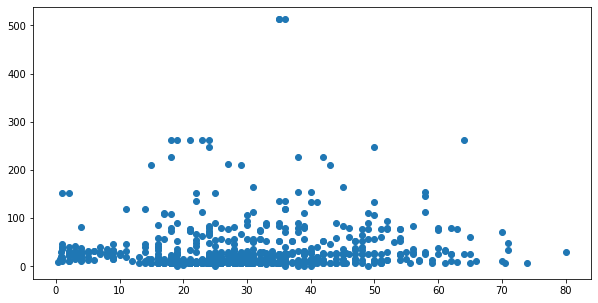

In [15]:
## scatter plot idade x taxa dos dados do titanic
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x='Age', y='Fare', data=df)

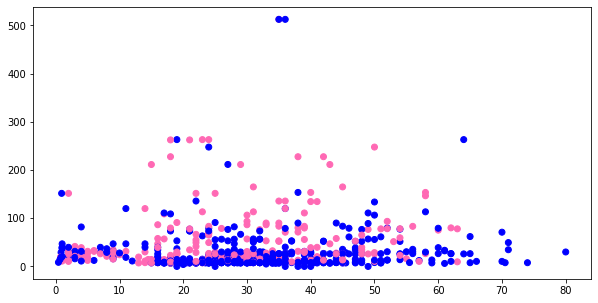

In [16]:
## scatter plot idade x taxa com cores por gênero
fig, ax = plt.subplots(figsize=(10,5))
colors = df['Sex'].map({'female' : 'hotpink', 'male' : 'blue'})
ax.scatter(x='Age', y='Fare', data=df, c=colors)

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

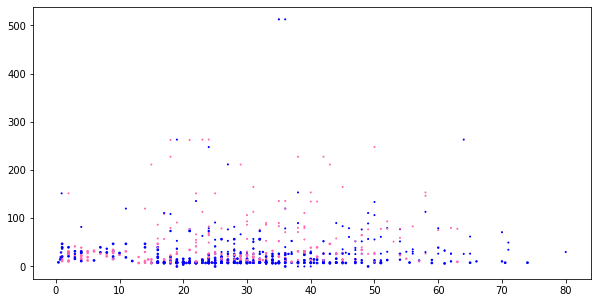

In [18]:
## scatter plot idade x taxa com cores por gênero, e tamanho por classe
fig, ax = plt.subplots(figsize=(10,5))
colors = df['Sex'].map({'female' : 'hotpink', 'male' : 'blue'})
ax.scatter(x='Age', y='Fare', data=df, c=colors,  s='Pclass')

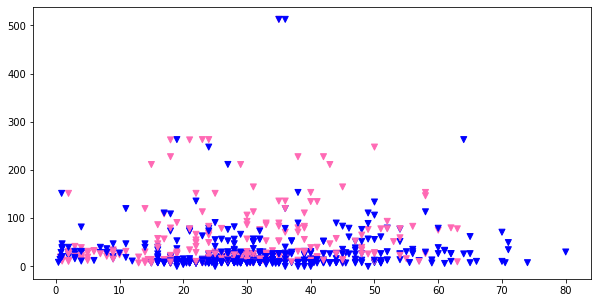

In [19]:
## scatter plot idade x taxa com cores por gênero, e mudando tipo de ponto
fig, ax = plt.subplots(figsize=(10,5))
colors = df['Sex'].map({'female' : 'hotpink', 'male' : 'blue'})
ax.scatter(x='Age', y='Fare', data=df, c=colors,  marker='v')

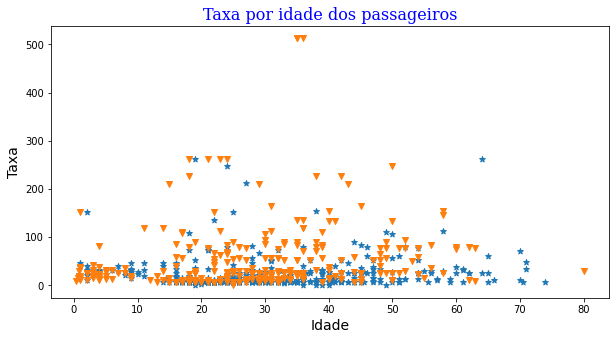

In [20]:
## scatter plot idade x taxa com cores por gênero, e mudando tipo de ponto por 'survived'
fig, ax = plt.subplots(figsize=(10,5))
df_survived1 = df[df['Survived']==1].copy()
df_survived0 = df[df['Survived']==0].copy()
#colors1 = df_survived1['Sex'].map({'female' : 'hotpink', 'male' : 'blue'})
#colors0 = df_survived0['Sex'].map({'female' : 'hotpink', 'male' : 'blue'})
ax.scatter(x='Age', y='Fare', data=df_survived0,# c=colors0,  
           marker='*')
ax.scatter(x='Age', y='Fare', data=df_survived1, #c=colors1,  
           marker='v')

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16}

ax.set_title('Taxa por idade dos passageiros', fontdict=font)
ax.set_ylabel('Taxa', size=14)
ax.set_xlabel('Idade', size=14)

plt.show()

Formatações de texto: https://matplotlib.org/stable/api/font_manager_api.html#matplotlib.font_manager.FontProperties

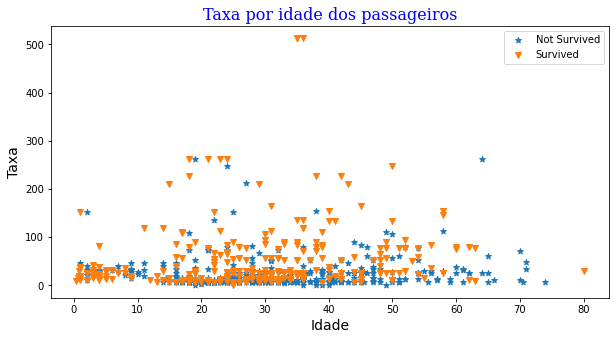

In [21]:
## scatter plot idade x taxa com cores por gênero, e mudando tipo de ponto por 'survived'
fig, ax = plt.subplots(figsize=(10,5))
df_survived1 = df[df['Survived']==1].copy()
df_survived0 = df[df['Survived']==0].copy()
#colors1 = df_survived1['Sex'].map({'female' : 'hotpink', 'male' : 'blue'})
#colors0 = df_survived0['Sex'].map({'female' : 'hotpink', 'male' : 'blue'})
data0 = ax.scatter(x='Age', y='Fare', data=df_survived0, #c=colors0,  
           marker='*', label='Not Survived')
data1 = ax.scatter(x='Age', y='Fare', data=df_survived1, #c=colors1,  
           marker='v', label='Survived')

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16}

ax.set_title('Taxa por idade dos passageiros', fontdict=font)
ax.set_ylabel('Taxa', size=14)
ax.set_xlabel('Idade', size=14)

ax.legend(handles=[data0,data1])

plt.show()

## Gráfico de linhas

In [22]:
df_vendas = pd.DataFrame({'Mês' : ['Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr'],
                         'Vendas' : np.random.randint(low=100, size=12),
                          'Produto' : np.repeat(['Samsung', 'Apple', 'Motorola'],4)})

Text(0.5, 1.0, 'Vendas por mês e produto')

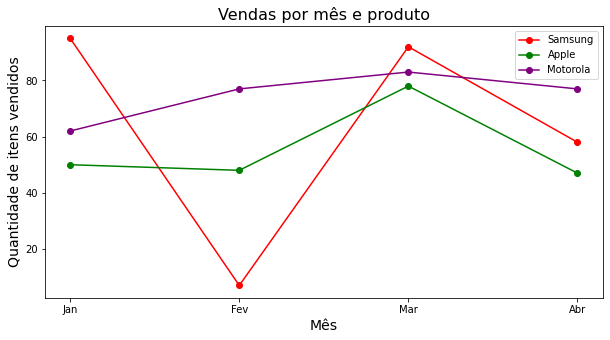

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('Mês', 'Vendas', data=df_vendas[df_vendas['Produto'] == 'Samsung'], label='Samsung', marker='o', c='red')
ax.plot('Mês', 'Vendas', data=df_vendas[df_vendas['Produto'] == 'Apple'], label='Apple', marker='o', c='green')
ax.plot('Mês', 'Vendas', data=df_vendas[df_vendas['Produto'] == 'Motorola'], label='Motorola', marker='o', c='purple')

ax.legend()
ax.set_ylabel('Quantidade de itens vendidos', size=14)
ax.set_xlabel('Mês', size=14)
ax.set_title('Vendas por mês e produto', size=16)

Text(0.5, 1.0, 'Vendas por mês e produto')

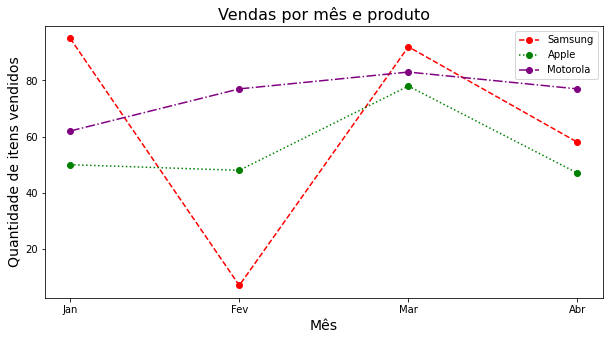

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('Mês', 'Vendas', data=df_vendas[df_vendas['Produto'] == 'Samsung'], label='Samsung', marker='o', 
        c='red', linestyle='--')
ax.plot('Mês', 'Vendas', data=df_vendas[df_vendas['Produto'] == 'Apple'], label='Apple', marker='o', 
        c='green', linestyle=':')
ax.plot('Mês', 'Vendas', data=df_vendas[df_vendas['Produto'] == 'Motorola'], label='Motorola', marker='o', 
        c='purple', linestyle='-.')

ax.legend()
ax.set_ylabel('Quantidade de itens vendidos', size=14)
ax.set_xlabel('Mês', size=14)
ax.set_title('Vendas por mês e produto', size=16)

## Gráfico de pizza

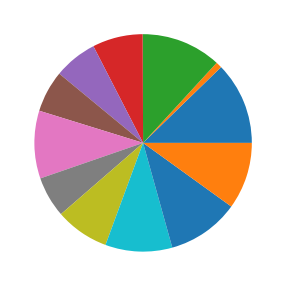

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(x='Vendas', data=df_vendas)
plt.show()

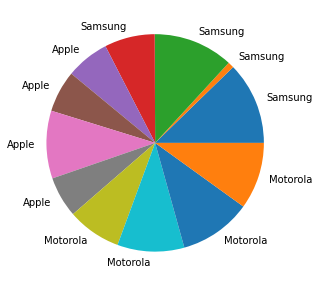

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(x='Vendas', data=df_vendas, labels='Produto')
plt.show()

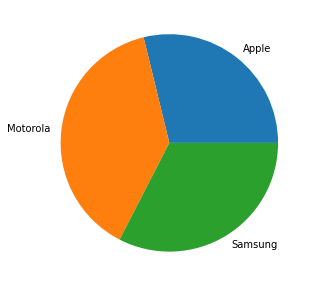

In [27]:
## Juntando as vendas por produto
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(x='Vendas', data=df_vendas.groupby(['Produto'],as_index=False).sum(), labels='Produto')
plt.show()

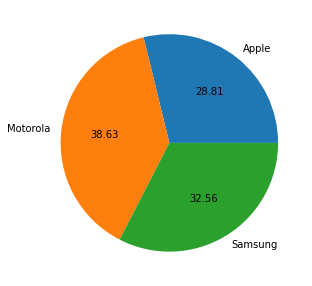

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(x='Vendas', data=df_vendas.groupby(['Produto'],as_index=False).sum(), labels='Produto', autopct='%.2f')
plt.show()

autopct = '%.1f': Coloca a porcentagem com 1 casa decimal

autopct = '%.2f': Coloca a porcentagem com 2 casas decimais

autopct = '%.1f%%': Coloca a porcentagem com 1 casa decimal e o símbolo '%' ao final

autopct = '%.2f%%': Coloca a porcentagem com 2 casas decimais e o símbolo '%' ao final

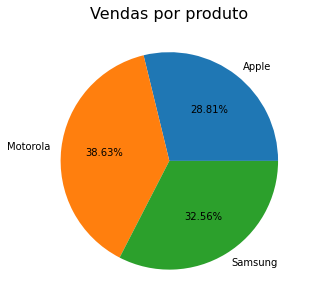

In [29]:
## colocando porcentagem
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(x='Vendas', data=df_vendas.groupby(['Produto'],as_index=False).sum(), labels='Produto', autopct='%.2f%%')
ax.set_title('Vendas por produto', size=16)
plt.show()

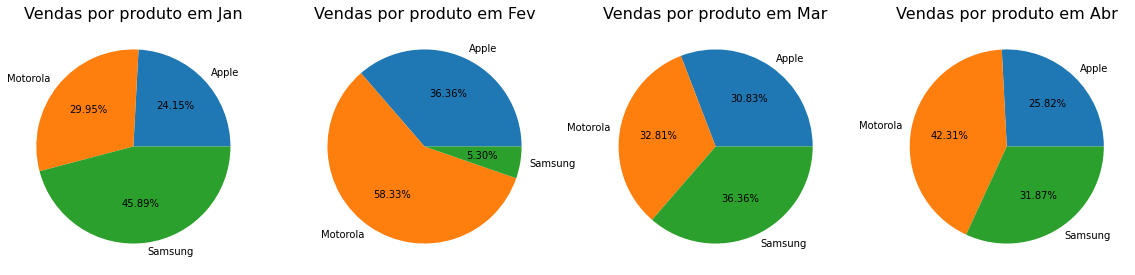

In [30]:
## Um gráfico de vendas por cada mês
fig, ax = plt.subplots(1,4, figsize=(20,15))
for i, mes in enumerate(df_vendas['Mês'].unique()):
    df_aux = df_vendas[df_vendas['Mês']==mes].copy()
    ax[i].pie(x='Vendas', data=df_aux.groupby(['Produto'],as_index=False).sum(), labels='Produto', autopct='%.2f%%')
    ax[i].set_title(f'Vendas por produto em {mes}', size=16)
#plt.show()

## Gráfico de barras

<BarContainer object of 12 artists>

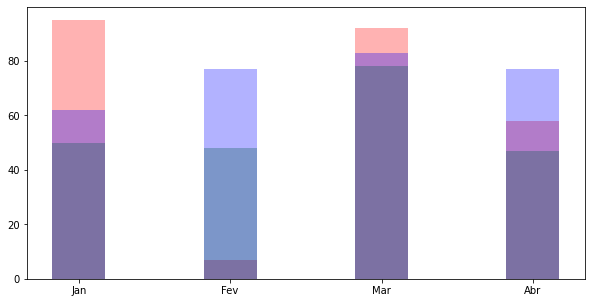

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar('Mês', 'Vendas', data=df_vendas, color=df_vendas['Produto'].map({'Samsung':'red',
                                                                   'Apple':'green',
                                                                   'Motorola':'blue'}), alpha=0.3, width = 0.35)

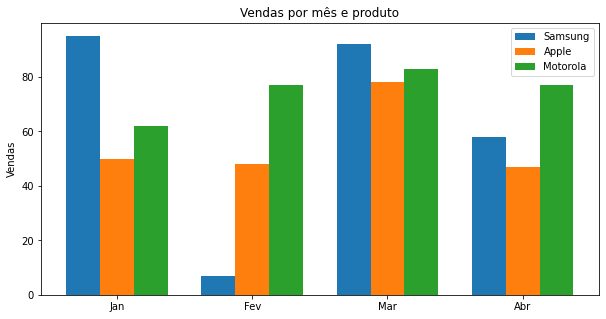

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(df_vendas['Mês'].unique()))
width = 0.25

for i, produto in enumerate(df_vendas['Produto'].unique()):
    df_aux = df_vendas[df_vendas['Produto']==produto].copy()
    ax.bar(ind+i/4, df_aux['Vendas'], label=produto, width = width)
    
ax.set_xticks(ind+1/4, df_vendas['Mês'].unique())
ax.set_ylabel('Vendas')
ax.set_title('Vendas por mês e produto')
ax.legend()
plt.show()

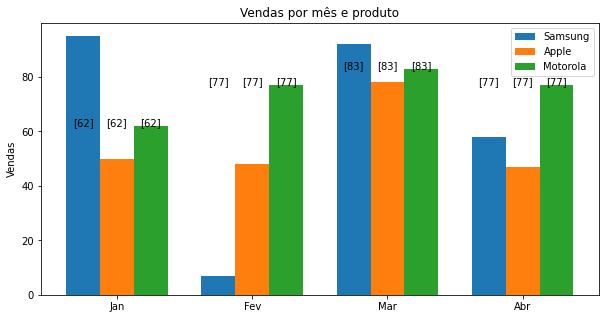

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(df_vendas['Mês'].unique()))
width = 0.25

for i, produto in enumerate(df_vendas['Produto'].unique()):
    df_aux = df_vendas[df_vendas['Produto']==produto].copy()
    ax.bar(ind+i/4, df_aux['Vendas'], label=produto, width = width)
    
for i, produto in enumerate(df_vendas['Produto'].unique()):
    for j, mes in enumerate(df_aux['Mês'].unique()):
        ax.text(j+i/4, y=df_aux[df_aux['Mês']==mes]['Vendas'].values, s=df_aux[df_aux['Mês']==mes]['Vendas'].values,
           ha='center')

ax.set_xticks(ind+1/4, df_vendas['Mês'].unique())
ax.set_ylabel('Vendas')
ax.set_title('Vendas por mês e produto')
ax.legend()
plt.show()

In [42]:
def valuelabel(meses, vendas):
    for i in range(len(meses)):
        ax.text(x=i,y=vendas[i],s=vendas[i], ha = 'center',
                 bbox = dict(facecolor = 'cyan', alpha =0.8))

## Histograma

Text(0.5, 0, 'Idade')

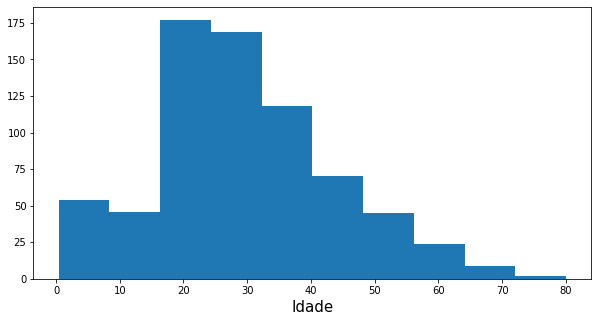

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(x='Age', data=df)
ax.set_xlabel('Idade', fontsize=15)

Text(0, 0.5, 'Frequência')

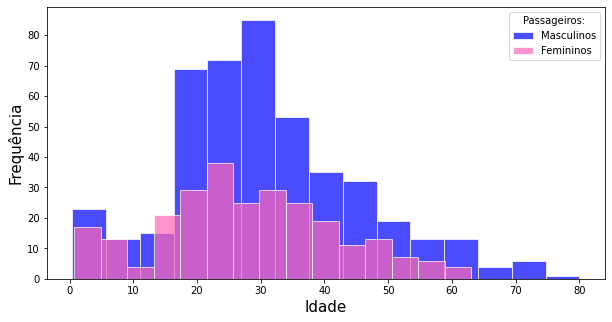

In [66]:
fig, ax = plt.subplots(figsize=(10,5))
df_male = df[df['Sex']=='male'].copy()
df_female = df[df['Sex']=='female'].copy()
ax.hist(x='Age', data=df_male, bins=15, color='blue', alpha=.7, edgecolor='white', label='Masculinos')
ax.hist(x='Age', data=df_female, bins=15, color='hotpink', alpha=.7, edgecolor='white', label='Femininos')

ax.legend(title='Passageiros:')

ax.set_xlabel('Idade', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

## Box-plot

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

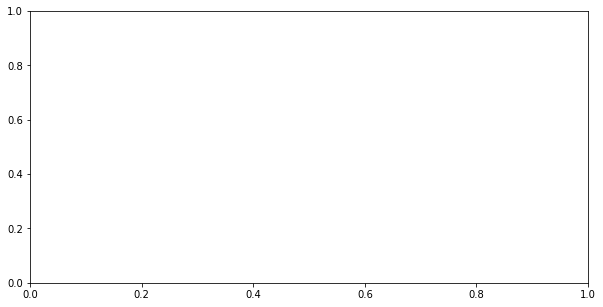

In [90]:
## nao aceita colunas não numéricas
fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(df)

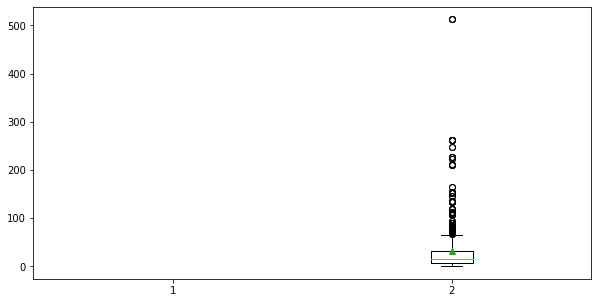

In [92]:
## eixo X fica 1 e 2 ao invés dos nomes das variaveis
fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(x=df[['Age', 'Fare']], showmeans=True)
plt.show()

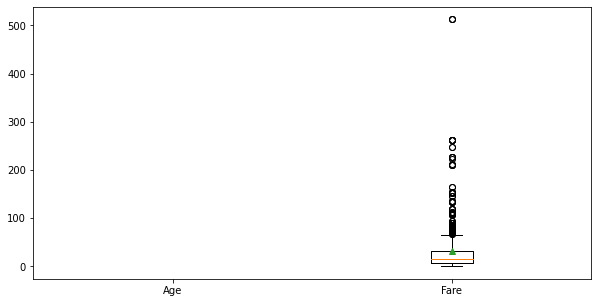

In [94]:
## arrumando valores no eixo X, mas percebendo que 'age' está vazio
fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(x=df[['Age', 'Fare']], showmeans=True)
ax.set_xticks(ticks=[1,2] ,labels=['Age', 'Fare'])
plt.show()

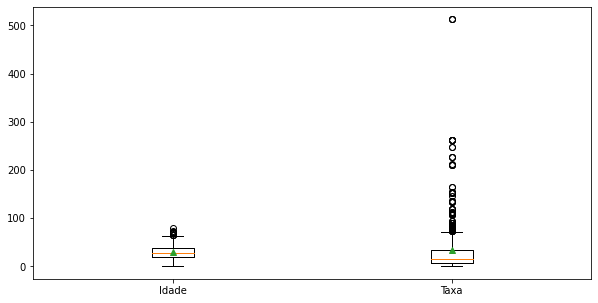

In [102]:
## colocando as informações de age sem valores nulos (mas cortando as observações das taxas tb)
fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(x=df[['Age', 'Fare']].dropna(), showmeans=True)
ax.set_xticks(ticks=[1,2], labels=['Idade','Taxa'])
plt.show()

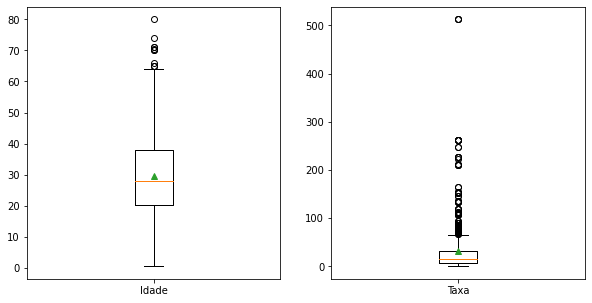

In [106]:
## colocando as informações apenas de age sem valores nulos
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].boxplot(x=df['Age'].dropna(), showmeans=True)
ax[0].set_xticks(ticks=[1], labels=['Idade'])
ax[1].boxplot(x=df[['Fare']], showmeans=True)
ax[1].set_xticks(ticks=[1], labels=['Taxa'])
plt.show()

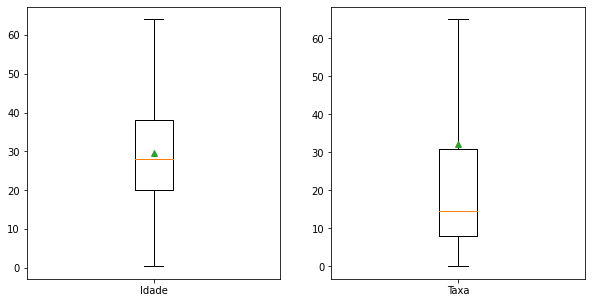

In [107]:
## retirando valores outliers
## colocando as informações apenas de age sem valores nulos
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].boxplot(x=df['Age'].dropna(), showmeans=True, showfliers=False)
ax[0].set_xticks(ticks=[1], labels=['Idade'])
ax[1].boxplot(x=df[['Fare']], showmeans=True, showfliers=False)
ax[1].set_xticks(ticks=[1], labels=['Taxa'])
plt.show()
